In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

## **CLIENT PROFILES**

In [2]:
df = pd.read_csv('df_final_demo.txt', delimiter=',')  # Adjust the delimiter based on your file format

# Save the DataFrame to a CSV file
df.to_csv('output.csv', index=False)  # Adjust the output file name as needed

df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [3]:
df.columns = ['client_id', 'client_yr_tenure', 'client_mo_tenure', 'client_age', 'gender', 'num_accts', 'balance', 'calls_6m', 'logins_6m']

In [4]:
df.gender = df['gender'].apply(lambda x: 'Unknown' if x in ['U', 'X'] else 'Male' if x in ['M'] else 'Female' if x in ['F'] else x)

In [5]:
df.dropna(inplace=True)

In [6]:
df['client_age'] = df['client_age'].astype(int)
df['client_yr_tenure'] = df['client_yr_tenure'].astype(int)
df['client_mo_tenure'] = df['client_mo_tenure'].astype(int)
df['num_accts'] = df['num_accts'].astype(int)
df['calls_6m'] = df['calls_6m'].astype(int)
df['logins_6m'] = df['logins_6m'].astype(int)

In [7]:
bins = [18, 24, 39, 65, float('inf')]
labels = ['18-24', '25-39', '40-64', '65+']

# Create a new column 'age_group' with the age bins
df['age_group'] = pd.cut(df['client_age'], bins=bins, labels=labels, right=False)

# Group by 'age_group' and find the number of unique values in each group
unique_values_by_age_group = df.groupby('age_group').nunique()

# Display the result
print(unique_values_by_age_group)


#Are the primary clients younger or older, new or long-standing?
#Here we can the majority of the clients fall into the 46-64 age group, with the average age being 52 and long-standing. 

           client_id  client_yr_tenure  client_mo_tenure  client_age  gender  \
age_group                                                                      
18-24           4280                35               314           6       3   
25-39          20625                41               380          15       3   
40-64          36070                51               452          26       3   
65+             9245                51               451          32       3   

           num_accts  balance  calls_6m  logins_6m  
age_group                                           
18-24              4     4277         8          9  
25-39              7    20589         8          9  
40-64              8    36004         8          9  
65+                6     9239         8          9  


/var/folders/mg/fz6127296bzcnc_rxkv52kvm0000gn/T/ipykernel_6840/3578084135.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_values_by_age_group = df.groupby('age_group').nunique()


In [8]:
df

,client_id,client_yr_tenure,client_mo_tenure,client_age,gender,num_accts,balance,calls_6m,logins_6m,age_group
0,836976,6,73,60,Unknown,2,45105.30,6,9,40-64
1,2304905,7,94,58,Unknown,2,110860.30,6,9,40-64
2,1439522,5,64,32,Unknown,2,52467.79,6,9,25-39
3,1562045,16,198,49,Male,2,67454.65,3,6,40-64
4,5126305,12,145,33,Female,2,103671.75,0,3,25-39
...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4,56,38,Unknown,3,1411062.68,5,5,25-39
70605,8981690,12,148,31,Male,2,101867.07,6,6,25-39
70606,333913,16,198,61,Female,2,40745.00,3,3,40-64
70607,1573142,21,255,68,Male,3,475114.69,4,4,65+


In [9]:
df.to_csv('demographics.csv', index=False)

## **EXPERIMENT ROSTER**

In [10]:
experiment = pd.read_csv('df_final_experiment_clients.txt', delimiter=',')  # Adjust the delimiter based on your file format

# Save the DataFrame to a CSV file
experiment.to_csv('output.csv', index=False)  # Adjust the output file name as needed

In [11]:
experiment.dropna(inplace=True)

experiment

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
50495,393005,Control
50496,2908510,Control
50497,7230446,Test
50498,5230357,Test


## **DIGITAL FOOTPRINTS**

In [12]:
web1 = pd.read_csv('df_final_web_data_pt_1.txt', delimiter=',')  # Adjust the delimiter based on your file format

# Save the DataFrame to a CSV file
web1.to_csv('output_1t.csv', index=False)  # Adjust the output file name as needed

web1

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [13]:
web2 = pd.read_csv('df_final_web_data_pt_2.txt', delimiter=',')  # Adjust the delimiter based on your file format

# Save the DataFrame to a CSV file
web2.to_csv('outp2ut.csv', index=False)  # Adjust the output file name as needed_

web2

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [14]:
total_web = pd.concat([web1, web2])

In [15]:
total_web.dropna(inplace=True)

In [16]:
total_web

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [17]:
total_web.process_step.value_counts()

process_step
start      243945
step_1     163193
step_2     133062
step_3     112242
confirm    102963
Name: count, dtype: int64

In [18]:
total = pd.merge(total_web, experiment, on='client_id',how='left')

In [19]:
total['Variation']=total.groupby('client_id')['Variation'].transform('first')

In [20]:
total

,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10,None
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29,None
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51,None
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34,None


In [21]:
total.dropna(inplace=True)

In [22]:
total['Variation'].value_counts(dropna=False)

Variation
Test       177847
Control    143462
Name: count, dtype: int64

In [23]:
total

,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
637487,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test
637532,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control
637533,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control
637534,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control


In [24]:
total.client_id.nunique()

50500

In [25]:
total.process_step = total['process_step'].apply(lambda x: 'verified' if x in ['confirm'] else x)

In [26]:
tested = total[total['Variation'] == 'Test']

tested

,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
637483,1574008,117364417_77840596075,528720790_71583064618_169151,verified,2017-05-06 23:51:05,Test
637484,1574008,117364417_77840596075,528720790_71583064618_169151,step_3,2017-05-06 23:50:40,Test
637485,1574008,117364417_77840596075,528720790_71583064618_169151,step_2,2017-05-06 23:43:47,Test
637486,1574008,117364417_77840596075,528720790_71583064618_169151,step_1,2017-05-06 23:43:34,Test


In [27]:
tested.client_id.nunique()

26968

In [28]:
confirm_users_count = tested[tested['process_step'] == 'verified'].shape[0]

# Count the total number of users
total_users_count = tested.shape[0]

# Calculate the proportion of users who reach the confirm step
confirm_proportion = confirm_users_count / total_users_count

In [29]:
control = total[total['Variation'] == 'Control']

control

,client_id,visitor_id,visit_id,process_step,date_time,Variation
13,4033851,762728880_76361333336,949661017_22392791362_127391,verified,2017-04-05 12:29:03,Control
14,4033851,762728880_76361333336,949661017_22392791362_127391,verified,2017-04-05 12:29:01,Control
15,4033851,762728880_76361333336,949661017_22392791362_127391,verified,2017-04-05 12:28:52,Control
16,4033851,762728880_76361333336,949661017_22392791362_127391,step_3,2017-04-05 12:26:08,Control
17,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:24:43,Control
...,...,...,...,...,...,...
637471,433098,5505424_50616523266,773565250_67577573147_389841,start,2017-05-13 15:30:47,Control
637532,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control
637533,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control
637534,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control


In [30]:
control.client_id.nunique()

23532

In [31]:
confirm_users_count_1 = control[control['process_step'] == 'verified'].shape[0]

# Count the total number of users
total_users_count_1 = control.shape[0]

# Calculate the proportion of users who reach the confirm step
confirm_proportion_1 = confirm_users_count_1 / total_users_count_1

In [32]:
difference = confirm_proportion - confirm_proportion_1

Client Behavior Analysis

In [33]:
#Answer the following questions about demographics:

#Who are the primary clients using this online process?

#Next, carry out a client behaviour analysis to answer any additional relevant questions you think are important.

## **Completion Rate: The proportion of users who reach the final 'verified' step.**

In [34]:
print("Proportion of users who reached the verified step in the Test environment:", confirm_proportion)
print("Proportion of users who reached the verified step in the Control environment:", confirm_proportion_1)
print("Difference of the verified proportion rates is:", difference)

Proportion of users who reached the verified step in the Test environment: 0.1446299347191687
Proportion of users who reached the verified step in the Control environment: 0.12201837420362187
Difference of the verified proportion rates is: 0.022611560515546844


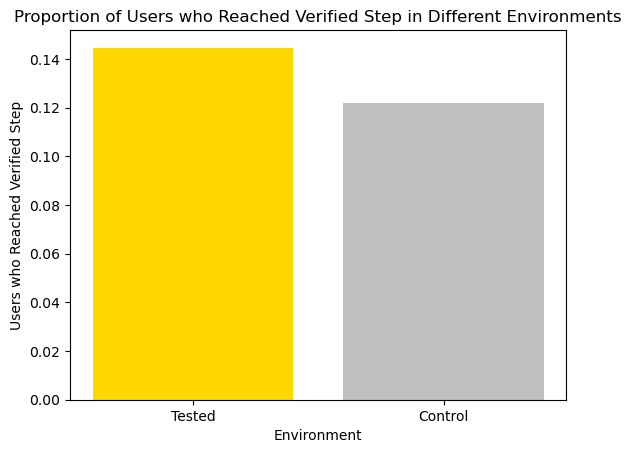

In [35]:
environments = ['Tested', 'Control']
proportions = [0.1446299347191687, 0.12201837420362187]

# Plot
plt.bar(environments, proportions, color=['gold', 'silver'])
plt.xlabel('Environment')
plt.ylabel('Users who Reached Verified Step')
plt.title('Proportion of Users who Reached Verified Step in Different Environments')
plt.show()

In [36]:
crosstab_result = pd.crosstab(total['Variation'], total['process_step'])

crosstab_result

process_step,start,step_1,step_2,step_3,verified
Variation,,,,,
Control,47608,29668,25886,22795,17505
Test,56474,38768,30989,25894,25722


In [37]:
from scipy.stats import chi2_contingency

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

#P-value is <= 0.05, this indicates that there is a significant association betweent the variables.  

(508.4364763023511, 1.0030756272740076e-108)

Text(0.5, 1.0, 'Rate by Steps')

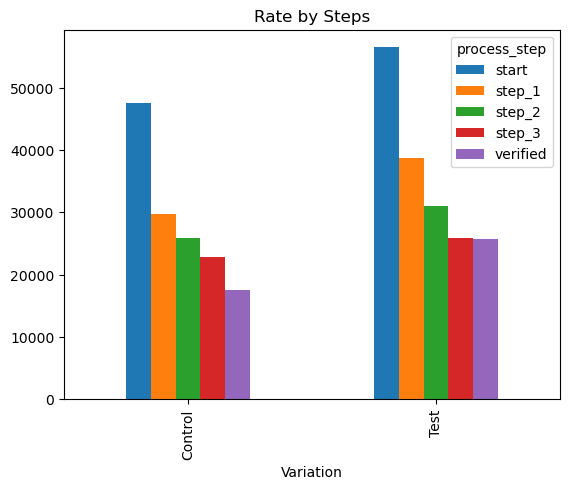

In [38]:
crosstab_result.plot(kind="bar", stacked=False)
plt.title("Rate by Steps")

## **Time Spent on Each Step: The average duration users spend on each step.**

In [39]:
#THIS IS IN HOURS

total['date_time'] = pd.to_datetime(total['date_time'])
total.sort_values(by=['client_id', 'date_time'], inplace=True)

# Calculate the duration to the next step for each user and identify the next step
total['next_date_time'] = total.groupby('client_id')['date_time'].shift(-1)
total['next_process_step'] = total.groupby('client_id')['process_step'].shift(-1)
total['duration'] = (total['next_date_time'] - total['date_time']).dt.total_seconds() / 3600

# Define the expected sequence of steps
expected_sequence = ['start', 'step_1', 'step_2', 'step_3', 'verified']

# Ensure that process_step names are correctly spelled and formatted
print("Unique steps in dataset:", total['process_step'].unique())

# Map process steps to their respective sequence order
step_map = {step: i for i, step in enumerate(expected_sequence)}
print("Step map:", step_map)

# Apply the valid transition filter for calculating durations
total['is_valid_transition'] = total.apply(
    lambda x: step_map.get(x['process_step'], -1) + 1 == step_map.get(x['next_process_step'], -1), axis=1)
valid_transitions = total[total['is_valid_transition']]

# Calculate average durations for valid transitions
average_durations = valid_transitions.groupby(['process_step', 'next_process_step'])['duration'].mean()

# Calculate error rates based on backward movements
total['is_error_transition'] = total.apply(
    lambda x: step_map.get(x['process_step'], -1) > step_map.get(x['next_process_step'], -1), axis=1)
error_counts = total[total['is_error_transition']]
error_rate = error_counts.shape[0] / total.shape[0]

# Print results
print("Average Time Spent from One Step to Next (in hours):")
for index, value in average_durations.items():
    print(f"From {index[0]} to {index[1]}: {value:.2f} hours")

print("\nError Rate (proportion of transitions that are errors):")
print(f"{error_rate:.2%}")

Unique steps in dataset: ['start' 'step_1' 'step_2' 'step_3' 'verified']
Step map: {'start': 0, 'step_1': 1, 'step_2': 2, 'step_3': 3, 'verified': 4}
Average Time Spent from One Step to Next (in hours):
From start to step_1: 0.25 hours
From step_1 to step_2: 0.01 hours
From step_2 to step_3: 0.08 hours
From step_3 to verified: 0.42 hours

Error Rate (proportion of transitions that are errors):
25.81%


In [40]:
# THIS IS IN SECONDS FOR TOTAL

# Step 1: Filter clients who have completed the process from start to verified
# Group by client_id and visitor_id and check if they have both 'start' and 'verified' steps
valid_clients = total.groupby(['client_id', 'visitor_id'])['process_step'].agg(lambda x: set(['start', 'verified']).issubset(set(x)))

# Filter the DataFrame for valid clients
valid_clients = valid_clients[valid_clients].index
filtered_df = total[total.set_index(['client_id', 'visitor_id']).index.isin(valid_clients)].reset_index()

# Step 2: Calculate the average duration for each process step
average_duration_by_step = filtered_df.groupby('process_step')['duration'].mean().reset_index()
average_duration_by_step.columns = ['process_step', 'average_duration']

# Step 3: Calculate the total average duration for the whole process
# Assuming the duration column represents the time taken to move to the next step
total_duration_by_client = filtered_df.groupby(['client_id', 'visitor_id'])['duration'].sum().mean()

# Display the results
print("Average Duration by Process Step:")
print(average_duration_by_step)
print("\nTotal average duration for the whole process from start to verified: {:.2f} units of time".format(total_duration_by_client))

Average Duration by Process Step:
  process_step  average_duration
0        start         17.070567
1       step_1          6.881706
2       step_2          2.757191
3       step_3          5.453728
4     verified         86.269390

Total average duration for the whole process from start to verified: 74.90 units of time


Text(0.5, 1.0, 'Avg Duration by Process Step - Total')

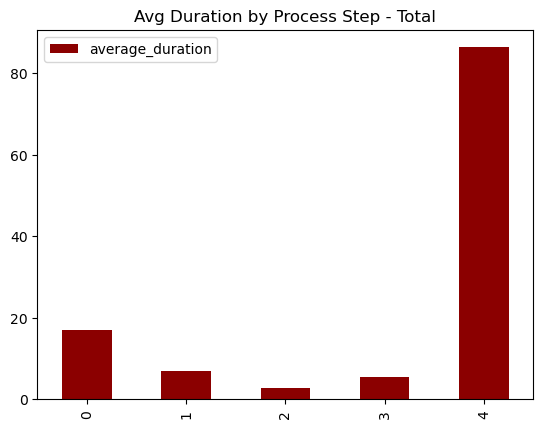

In [41]:
average_duration_by_step.plot(kind="bar", stacked=False, color='darkred')
plt.title("Avg Duration by Process Step - Total")

In [42]:
# THIS IS IN HOUR FOR CONTROL
control['date_time'] = pd.to_datetime(control['date_time'])
control.sort_values(by=['client_id', 'date_time'], inplace=True)

# Calculate the duration to the next step for each user and identify the next step
control['next_date_time'] = control.groupby('client_id')['date_time'].shift(-1)
control['next_process_step'] = control.groupby('client_id')['process_step'].shift(-1)
control['duration'] = (control['next_date_time'] - control['date_time']).dt.total_seconds() / 3600

# Define the expected sequence of steps
expected_sequence = ['start', 'step_1', 'step_2', 'step_3', 'verified']

# Ensure that process_step names are correctly spelled and formatted
print("Unique steps in dataset:", control['process_step'].unique())

# Map process steps to their respective sequence order
step_map = {step: i for i, step in enumerate(expected_sequence)}
print("Step map:", step_map)

# Apply the valid transition filter for calculating durations
control['is_valid_transition'] = control.apply(
    lambda x: step_map.get(x['process_step'], -1) + 1 == step_map.get(x['next_process_step'], -1), axis=1)
valid_transitions = control[control['is_valid_transition']]

# Calculate average durations for valid transitions
average_durations = valid_transitions.groupby(['process_step', 'next_process_step'])['duration'].mean()

print("Average Time Spent from One Step to Next (in hours):")
for index, value in average_durations.items():
    print(f"From {index[0]} to {index[1]}: {value:.2f} hours")


/var/folders/mg/fz6127296bzcnc_rxkv52kvm0000gn/T/ipykernel_6840/983132256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control['date_time'] = pd.to_datetime(control['date_time'])
/var/folders/mg/fz6127296bzcnc_rxkv52kvm0000gn/T/ipykernel_6840/983132256.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control.sort_values(by=['client_id', 'date_time'], inplace=True)
/var/folders/mg/fz6127296bzcnc_rxkv52kvm0000gn/T/ipykernel_6840/983132256.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

Unique steps in dataset: ['start' 'step_1' 'step_2' 'step_3' 'verified']
Step map: {'start': 0, 'step_1': 1, 'step_2': 2, 'step_3': 3, 'verified': 4}
Average Time Spent from One Step to Next (in hours):
From start to step_1: 0.25 hours
From step_1 to step_2: 0.01 hours
From step_2 to step_3: 0.02 hours
From step_3 to verified: 0.42 hours


/var/folders/mg/fz6127296bzcnc_rxkv52kvm0000gn/T/ipykernel_6840/983132256.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control['is_valid_transition'] = control.apply(


In [43]:
# THIS IS IN HOUR FOR TESTED

tested['date_time'] = pd.to_datetime(tested['date_time'])
tested.sort_values(by=['client_id', 'date_time'], inplace=True)

# Calculate the duration to the next step for each user and identify the next step
tested['next_date_time'] = tested.groupby('client_id')['date_time'].shift(-1)
tested['next_process_step'] = tested.groupby('client_id')['process_step'].shift(-1)
tested['duration'] = (tested['next_date_time'] - tested['date_time']).dt.total_seconds() / 3600

# Define the expected sequence of steps
expected_sequence = ['start', 'step_1', 'step_2', 'step_3', 'verified']

# Ensure that process_step names are correctly spelled and formatted
print("Unique steps in dataset:", tested['process_step'].unique())

# Map process steps to their respective sequence order
step_map = {step: i for i, step in enumerate(expected_sequence)}
print("Step map:", step_map)

# Apply the valid transition filter for calculating durations
tested['is_valid_transition'] = tested.apply(
    lambda x: step_map.get(x['process_step'], -1) + 1 == step_map.get(x['next_process_step'], -1), axis=1)
valid_transitions = tested[tested['is_valid_transition']]

# Calculate average durations for valid transitions
average_durations = valid_transitions.groupby(['process_step', 'next_process_step'])['duration'].mean()

# Print results
print("Average Time Spent from One Step to Next (in hours):")
for index, value in average_durations.items():
    print(f"From {index[0]} to {index[1]}: {value:.2f} hours")

/var/folders/mg/fz6127296bzcnc_rxkv52kvm0000gn/T/ipykernel_6840/3197022844.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tested['date_time'] = pd.to_datetime(tested['date_time'])
/var/folders/mg/fz6127296bzcnc_rxkv52kvm0000gn/T/ipykernel_6840/3197022844.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tested.sort_values(by=['client_id', 'date_time'], inplace=True)
/var/folders/mg/fz6127296bzcnc_rxkv52kvm0000gn/T/ipykernel_6840/3197022844.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

Unique steps in dataset: ['start' 'step_1' 'step_2' 'step_3' 'verified']
Step map: {'start': 0, 'step_1': 1, 'step_2': 2, 'step_3': 3, 'verified': 4}
Average Time Spent from One Step to Next (in hours):
From start to step_1: 0.25 hours
From step_1 to step_2: 0.01 hours
From step_2 to step_3: 0.13 hours
From step_3 to verified: 0.42 hours


/var/folders/mg/fz6127296bzcnc_rxkv52kvm0000gn/T/ipykernel_6840/3197022844.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tested['is_valid_transition'] = tested.apply(


In [44]:
# THIS IS IN SECONDS FOR CONTROL

# Step 1: Filter clients who have completed the process from start to verified
# Group by client_id and visitor_id and check if they have both 'start' and 'verified' steps
valid_clients = control.groupby(['client_id', 'visitor_id'])['process_step'].agg(lambda x: set(['start', 'verified']).issubset(set(x)))

# Filter the DataFrame for valid clients
valid_clients = valid_clients[valid_clients].index
filtered_df = control[control.set_index(['client_id', 'visitor_id']).index.isin(valid_clients)].reset_index()

# Step 2: Calculate the average duration for each process step
average_duration_by_step_1 = filtered_df.groupby('process_step')['duration'].mean().reset_index()
average_duration_by_step_1.columns = ['process_step', 'average_duration']

# Step 3: Calculate the total average duration for the whole process
# Assuming the duration column represents the time taken to move to the next step
total_duration_by_client = filtered_df.groupby(['client_id', 'visitor_id'])['duration'].sum().mean()

# Display the results
print("Average Duration by Process Step:")
print(average_duration_by_step_1)
print("\nTotal average duration for the whole process from start to verified: {:.2f} units of time".format(total_duration_by_client))

Average Duration by Process Step:
  process_step  average_duration
0        start         19.615221
1       step_1          8.867763
2       step_2          3.372915
3       step_3          7.408274
4     verified         87.773669

Total average duration for the whole process from start to verified: 79.23 units of time


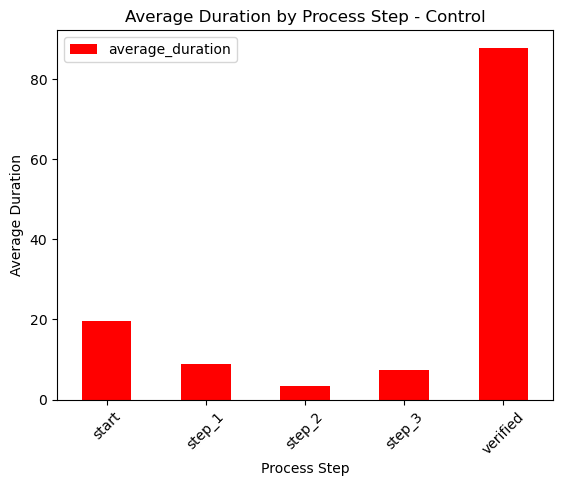

In [45]:
average_duration_by_step_1.set_index('process_step', inplace=True)

# Plotting the bar chart
average_duration_by_step_1.plot(kind='bar', color='red')
plt.title("Average Duration by Process Step - Control")
plt.xlabel("Process Step")
plt.ylabel("Average Duration")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [46]:
# THIS IS SECONDS FOR TESTED

# Step 1: Filter clients who have completed the process from start to verified
# Group by client_id and visitor_id and check if they have both 'start' and 'verified' steps
valid_clients_test = tested.groupby(['client_id', 'visitor_id'])['process_step'].agg(lambda x: set(['start', 'verified']).issubset(set(x)))

# Filter the DataFrame for valid clients
valid_clients_test = valid_clients_test[valid_clients_test].index
filtered_df = tested[tested.set_index(['client_id', 'visitor_id']).index.isin(valid_clients_test)].reset_index()

# Step 2: Calculate the average duration for each process step
average_duration_by_step_2 = filtered_df.groupby('process_step')['duration'].mean().reset_index()
average_duration_by_step_2.columns = ['process_step', 'average_duration']

# Step 3: Calculate the total average duration for the whole process
# Assuming the duration column represents the time taken to move to the next step
total_duration_by_client = filtered_df.groupby(['client_id', 'visitor_id'])['duration'].sum().mean()

# Display the results
print("Average Duration by Process Step:")
print(average_duration_by_step_2)
print("\nTotal average duration for the whole process from start to verified: {:.2f} units of time".format(total_duration_by_client))

Average Duration by Process Step:
  process_step  average_duration
0        start         15.030075
1       step_1          5.384352
2       step_2          2.227117
3       step_3          3.706426
4     verified         85.423748

Total average duration for the whole process from start to verified: 71.31 units of time


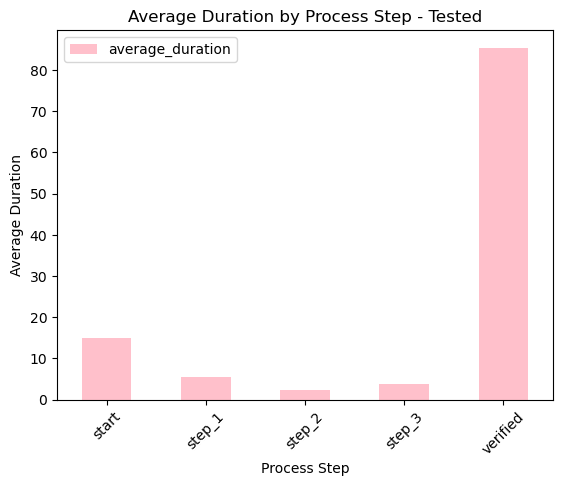

In [47]:
average_duration_by_step_2.set_index('process_step', inplace=True)

# Plotting the bar chart
average_duration_by_step_2.plot(kind='bar', color='pink')
plt.title("Average Duration by Process Step - Tested")
plt.xlabel("Process Step")
plt.ylabel("Average Duration")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## **Error Rates: If there’s a step where users go back to a previous step, it may indicate confusion or an error.**

In [48]:
# Calculate error rates based on backward movements for Tested Group 

tested['is_error_transition'] = tested.apply(
    lambda x: step_map.get(x['process_step'], -1) > step_map.get(x['next_process_step'], -1), axis=1)
error_counts = tested[tested['is_error_transition']]
error_rate = error_counts.shape[0] / tested.shape[0]

print("\nError Rate (proportion of transitions that are errors):")
print(f"{error_rate:.2%}")


Error Rate (proportion of transitions that are errors):
25.90%


/var/folders/mg/fz6127296bzcnc_rxkv52kvm0000gn/T/ipykernel_6840/311591563.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tested['is_error_transition'] = tested.apply(


In [49]:
# Calculate error rates based on backward movements for Control Group

control['is_error_transition'] = control.apply(
    lambda x: step_map.get(x['process_step'], -1) > step_map.get(x['next_process_step'], -1), axis=1)
error_counts = control[control['is_error_transition']]
error_rate = error_counts.shape[0] / control.shape[0]

print("\nError Rate (proportion of transitions that are errors):")
print(f"{error_rate:.2%}")


Error Rate (proportion of transitions that are errors):
25.70%


/var/folders/mg/fz6127296bzcnc_rxkv52kvm0000gn/T/ipykernel_6840/1761969695.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control['is_error_transition'] = control.apply(


## **Step Completion Rates - Step Completion Rates: Calculate the completion rates for each step of the process separately. This will help identify any specific steps where users are experiencing difficulties or drop-offs.**

In [50]:
# Convert date_time column to datetime format
total['date_time'] = pd.to_datetime(total['date_time'])

In [51]:
# # Calculate the total number of unique visitors who started the process
# total_unique_visitors = total['visitor_id'].nunique()
# # Group by process step and calculate the completion rate for each step
# step_completion_rate = total.groupby('process_step').apply(lambda x: (x['visitor_id'].nunique() / total_unique_visitors) * 100)
# # Print the completion rate for each step
# print("Step Completion Rate:")
# print(step_completion_rate)

In [52]:
# Calculate the total number of unique visitors who started the process for Control 

control_unique_visitors = control['visitor_id'].nunique()
# Group by process step and calculate the completion rate for each step
control_step_completion_rate = control.groupby('process_step').apply(lambda x: (x['visitor_id'].nunique() / control_unique_visitors) * 100)
# Rounding rate 
control_step_completion_rate = round(control_step_completion_rate, 2)
# Print the completion rate for each step
print("Control - Step Completion Rate:")
print(control_step_completion_rate)

Control - Step Completion Rate:
process_step
start       98.60
step_1      80.81
step_2      72.93
step_3      67.36
verified    59.24
dtype: float64


In [53]:
# Calculate the total number of unique visitors who started the process for Tested

tested_unique_visitors = tested['visitor_id'].nunique()
# Group by process step and calculate the completion rate for each step
test_step_completion_rate = tested.groupby('process_step').apply(lambda x: (x['visitor_id'].nunique() / tested_unique_visitors) * 100)
#rounding rate 
test_step_completion_rate = round(test_step_completion_rate, 2)
# Print the completion rate for each step
print("Test - Step Completion Rate:")
print(test_step_completion_rate)

Test - Step Completion Rate:
process_step
start       96.05
step_1      85.41
step_2      76.80
step_3      71.09
verified    65.19
dtype: float64


Text(0.5, 1.0, 'Step Completion Rate - Control')

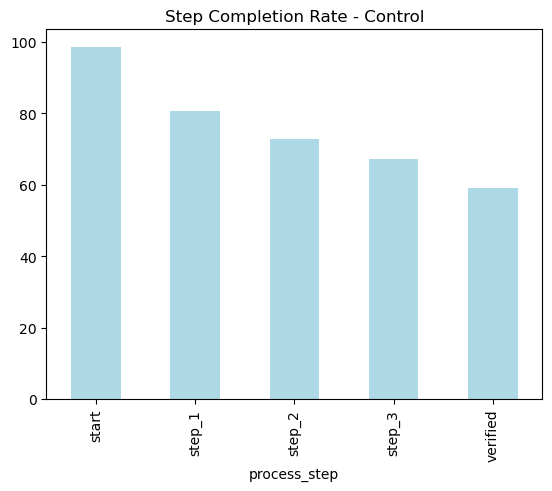

In [54]:
control_step_completion_rate.plot(kind="bar", stacked=False, color='lightblue')
plt.title("Step Completion Rate - Control")

Text(0.5, 1.0, 'Step Completion Rate - Tested')

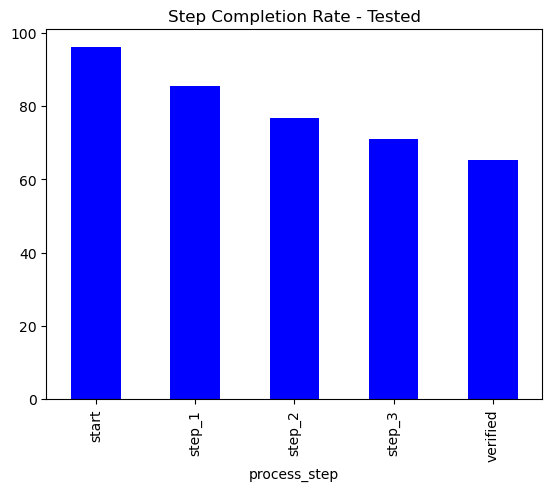

In [55]:
test_step_completion_rate.plot(kind="bar", stacked=False, color='blue')
plt.title("Step Completion Rate - Tested")

Bounce Rate - The percentage of users who navigate away from the website after viewing only one page. A high bounce rate may indicate that the UI is not engaging or intuitive enough to hold users' attention.

In [56]:
# Identify visitors who visited the "start" step but did not visit any subsequent steps for Total

#bounce_visitors = total[total['process_step'] == 'start']['visitor_id'].unique()
#for step in total['process_step'].unique():
    #if step != 'start':
        #bounce_visitors = np.setdiff1d(bounce_visitors, total[total['process_step'] == step]['visitor_id'].unique())
# Calculate the bounce rate
#bounce_rate = (len(bounce_visitors) / total_unique_visitors) * 100
# Print the bounce rate
#print("Bounce Rate: {:.2f}%".format(bounce_rate))

In [57]:
# Identify visitors who visited the "start" step but did not visit any subsequent steps for Control

control_bounce_visitors = control[control['process_step'] == 'start']['visitor_id'].unique()
for step in control['process_step'].unique():
    if step != 'start':
        control_bounce_visitors = np.setdiff1d(control_bounce_visitors, control[control['process_step'] == step]['visitor_id'].unique())
# Calculate the bounce rate
control_bounce_rate = (len(control_bounce_visitors) / control_unique_visitors) * 100
#Rounding rate 
control_bounce_rate = round(control_bounce_rate, 2)
# Print the bounce rate
print("Control - Bounce Rate: {:.2f}%".format(control_bounce_rate))

Control - Bounce Rate: 18.02%


In [58]:
# Identify visitors who visited the "start" step but did not visit any subsequent steps for Tested

test_bounce_visitors = tested[tested['process_step'] == 'start']['visitor_id'].unique()
for step in tested['process_step'].unique():
    if step != 'start':
        test_bounce_visitors = np.setdiff1d(test_bounce_visitors, tested[tested['process_step'] == step]['visitor_id'].unique())
# Calculate the bounce rate
test_bounce_rate = (len(test_bounce_visitors) / tested_unique_visitors) * 100
#Rounding rate 
test_bounce_rate = round(test_bounce_rate, 2)
# Print the bounce rate
print("Test - Bounce Rate: {:.2f}%".format(test_bounce_rate))

Test - Bounce Rate: 10.81%


In [59]:
total.to_csv('total_df.csv', index=False)

## **Completion Rate: Account Balance**

In [60]:
# Calculate completion rate of all steps for clients in the process steps dataframe
total_clients_control = len(control['client_id'].unique())
completed_all_steps_control = len(control.groupby(['client_id', 'visitor_id']).filter(lambda x: set(['start', 'verified']).issubset(set(x['process_step']))))
completion_rate_control = completed_all_steps_control / total_clients_control
# Analyze distribution of account balances in the account balances dataframe
mean_balance = df['balance'].mean()
median_balance = df['balance'].median()
quartiles_balance = df['balance'].quantile([0.25, 0.5, 0.75])
max_balance = df['balance'].max()
print(mean_balance)
print(median_balance) 
print(quartiles_balance)
print(max_balance)

147446.72652817518
63334.59
0.25     37346.5975
0.50     63334.5900
0.75    137546.1175
Name: balance, dtype: float64
16320040.15


In [61]:
# Compare completion rate based on account balances
high_balance_clients = df[df['balance'] > 137546]
low_balance_clients = df[df['balance'] <= 137545]
# Calculate completion rate for high and low balance clients
high_balance_completion_rate = len(control[control['client_id'].isin(high_balance_clients['client_id'])]) / len(high_balance_clients)
low_balance_completion_rate = len(control[control['client_id'].isin(low_balance_clients['client_id'])]) / len(low_balance_clients)
# Compare the completion rates
print("Control - Completion Rate for High Balance Clients:", high_balance_completion_rate)
print("Control - Completion Rate for Low Balance Clients:", low_balance_completion_rate)

Control - Completion Rate for High Balance Clients: 2.220182446597541
Control - Completion Rate for Low Balance Clients: 1.968533383700066


In [62]:
# Calculate completion rate of all steps for clients in the process steps dataframe
total_clients_test = len(tested['client_id'].unique())
completed_all_steps_tested = len(tested.groupby(['client_id', 'visitor_id']).filter(lambda x: set(['start', 'verified']).issubset(set(x['process_step']))))
completion_rate_tested = completed_all_steps_tested / total_clients_test

In [63]:
# Compare completion rate based on account balances
high_balance_test = df[df['balance'] > 137546]
low_balance_test = df[df['balance'] <= 137545]
# Calculate completion rate for high and low balance clients
high_balance_completion_rate_test = len(tested[tested['client_id'].isin(high_balance_test['client_id'])]) / len(high_balance_test)
low_balance_completion_rate_test = len(tested[tested['client_id'].isin(low_balance_test['client_id'])]) / len(low_balance_test)
# Compare the completion rates
print("Completion Rate for High Balance Clients:", high_balance_completion_rate_test)
print("Completion Rate for Low Balance Clients:", low_balance_completion_rate_test)

Completion Rate for High Balance Clients: 2.7872400702589384
Completion Rate for Low Balance Clients: 2.4288412503541412


In [64]:
#Creating dataframe that includes 'balance' along with digital footprint information
merged_df = pd.merge(df, total, on='client_id', how='inner')
merged_df = merged_df.drop(columns=['client_yr_tenure', 'client_mo_tenure', 'client_age',
       'gender', 'num_accts', 'calls_6m', 'logins_6m', 'age_group'])

In [65]:
# Filter for rows where the process_step is 'verified'
verified_df = merged_df[merged_df['process_step'] == 'verified']

In [66]:
#Creating balance threshold based on top 75th percentile of account balances 
balance_threshold = 137546

In [67]:
#Creating new column that classes rows according to high or low balance 
verified_df['balance_class'] = verified_df['balance'].apply(lambda x: 'High' if x > balance_threshold else 'Low')

/var/folders/mg/fz6127296bzcnc_rxkv52kvm0000gn/T/ipykernel_6840/3205729116.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verified_df['balance_class'] = verified_df['balance'].apply(lambda x: 'High' if x > balance_threshold else 'Low')


In [68]:
# Group by 'balance_class' and count unique 'client_id'
grouped = verified_df.groupby('balance_class').agg(num_verified_clients=('client_id', 'nunique')).reset_index()

In [69]:
crosstab_result_balance = pd.crosstab(verified_df['Variation'], verified_df['balance_class'])
crosstab_result_balance

balance_class,High,Low
Variation,,
Control,4779,12719
Test,7496,18220


In [70]:
from scipy.stats import chi2_contingency
#Doing a Chi-squared test on the crosstab to see statistical significance of account balance with completion 

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result_balance)
chi2_statistic, chi2_p_value

(17.197234825103287, 3.369264185404865e-05)

## **KPI's**

In [71]:
# Example results (assuming you've calculated these previously)
data_control = {
    'process_step': ['start', 'step_1', 'step_2', 'step_3', 'verified'],
    'average_duration': [19.615221, 8.867763, 3.372915, 7.408274, 87.773669],
    'total_duration': [87.773669] * 5  # Repeating the total duration for simplicity
}
data_test = {
    'process_step': ['start', 'step_1', 'step_2', 'step_3', 'verified'],
    'average_duration': [17.070567, 6.881706, 2.757191, 5.453728, 86.269390],
    'total_duration': [86.269390] * 5  # Repeating the total duration for simplicity
}
# Creating DataFrames
df_control = pd.DataFrame(data_control)
df_test = pd.DataFrame(data_test)
# Adding specific metrics
# Control metrics
df_control['Completion Rate High Balance'] = 2.220182446597541
df_control['Completion Rate Low Balance'] = 1.968533383700066
df_control['Bounce Rate'] = 18.02  # Example, use actual value if different
df_control['Error Rate'] = 25.70   # Example, use actual value if different
# Test metrics - Now using the new values provided
df_test['Completion Rate High Balance'] = 2.7872400702589384
df_test['Completion Rate Low Balance'] = 2.4288412503541412
df_test['Bounce Rate'] = 10.81  # Example, use actual value if different
df_test['Error Rate'] = 25.90   # Example, use actual value if different
# Adding a column to distinguish between control and test
df_control['group'] = 'Control'
df_test['group'] = 'Test'
# Combining the data
df_combined = pd.concat([df_control, df_test], ignore_index=True)
# Display the combined DataFrame
df_combined

,process_step,average_duration,total_duration,Completion Rate High Balance,Completion Rate Low Balance,Bounce Rate,Error Rate,group
0,start,19.615221,87.773669,2.220182,1.968533,18.02,25.7,Control
1,step_1,8.867763,87.773669,2.220182,1.968533,18.02,25.7,Control
2,step_2,3.372915,87.773669,2.220182,1.968533,18.02,25.7,Control
3,step_3,7.408274,87.773669,2.220182,1.968533,18.02,25.7,Control
4,verified,87.773669,87.773669,2.220182,1.968533,18.02,25.7,Control
5,start,17.070567,86.269390,2.787240,2.428841,10.81,25.9,Test
6,step_1,6.881706,86.269390,2.787240,2.428841,10.81,25.9,Test
7,step_2,2.757191,86.269390,2.787240,2.428841,10.81,25.9,Test
8,step_3,5.453728,86.269390,2.787240,2.428841,10.81,25.9,Test
9,verified,86.269390,86.269390,2.787240,2.428841,10.81,25.9,Test


In [72]:
df_combined.to_csv('combined_data.csv', index=False)